# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [44]:
import pandas as pd

In [45]:
# load the uploaded content into a dataframe
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [46]:
# import the library and initialize a variable for the url
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# get the image prediction through requests
response = requests.get(url)

# write the response content into a tsv file
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [47]:
# open and save the file content into the dataframe
image_pred = pd.read_csv('image_predictions.tsv', '\t')

<ipython-input-47-773126111061>:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  image_pred = pd.read_csv('image_predictions.tsv', '\t')


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [48]:
import tweepy

consumer_key = 'my key'
consumer_secret = 'my secret'
access_token = 'my access'
access_secret = 'my access secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [49]:
for tweet_id in twitter_df['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        print(tweet)
        break
    except:
        print(f'Error with the tweet id {tweet_id}')
    break

#### I could not access the twitter api, therefore, had to use the given data on the platform

In [50]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')

        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            #pass
            #For the purpose of successful cell running, this line has been added
            break
end = timer()
print(end - start)
print(fails_dict)

In [51]:
import json
# Read the file into a pandas Data Frame
df_list = []
with open('tweet_json.txt', 'r') as tweet_file:
    for line_text in tweet_file:
        line = json.loads(line_text)
        tweet_id = line['id']
        retweet_count = line['retweet_count']
        favourite_count = line['favorite_count']
        df_list.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favourite_count': favourite_count})

# Open a pandas dataframe
tcounts_df = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favourite_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### twitter_df table

In [52]:
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### None instead of NaN for null values in dog name column

In [53]:
twitter_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1361,703079050210877440,NaN,NaN,2016-02-26 04:48:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Butternut Cumberfloof. It's not wind...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703079050...,11,10,a,None,None,None,None
2224,668291999406125056,NaN,NaN,2015-11-22 04:56:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can't do better than he did. 10/10 https://t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668291999...,10,10,None,None,None,None,None
1092,737322739594330112,NaN,NaN,2016-05-30 16:40:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lily. She's not injured or anythi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737322739...,9,10,Lily,None,None,None,None
492,813217897535406080,NaN,NaN,2016-12-26 03:00:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is Atlas. He went all out this year. 13/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813217897...,13,10,Atlas,None,None,None,None
1540,689659372465688576,NaN,NaN,2016-01-20 04:03:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ricky. He's being escorted out of the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689659372...,8,10,Ricky,None,None,None,None
2218,668507509523615744,NaN,NaN,2015-11-22 19:13:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Birmingham Quagmire named Chuk. Love...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668507509...,10,10,a,None,None,None,None
515,811386762094317568,NaN,NaN,2016-12-21 01:44:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Craig. That's actually a normal sized ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/811386762...,11,10,Craig,None,None,pupper,None
867,761976711479193600,NaN,NaN,2016-08-06 17:26:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shelby. She finds stuff to put on her ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761976711...,12,10,Shelby,None,None,None,None
347,831911600680497154,NaN,NaN,2017-02-15 17:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Kuyu. He was trapped in a well for 10 day...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831911600...,14,10,Kuyu,None,None,None,None
2027,671874878652489728,NaN,NaN,2015-12-02 02:13:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mia. She was specifically told not get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671874878...,10,10,Mia,None,None,None,None


In [54]:
twitter_df.shape

(2356, 17)

#### Missing values in 'in_reply_to' and 'retweeted_status' columns
#### timestamp column's data type object (string)

In [55]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Source column with identical href elements

In [56]:
# source column with identical href elements
sum(twitter_df['source'].duplicated())

2352

In [57]:
twitter_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

#### Invalid score on location 313

In [58]:
twitter_df[twitter_df['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [59]:
twitter_df[twitter_df['rating_denominator'] == 0]['text'].values

array(["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"],
      dtype=object)

In [60]:
twitter_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

#### Dog names such as a/an/the/all/etc due to the potential extraction after the phrase 'This is'

In [61]:
twitter_df['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [62]:
twitter_df[twitter_df['name'].apply(lambda x: x.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [63]:
twitter_df.query('name == "an"').head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None
1362,703041949650034688,NaN,NaN,2016-02-26 02:20:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an East African Chalupa Seal. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
2204,668636665813057536,NaN,NaN,2015-11-23 03:46:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Irish Rigatoni terrier named Berta....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668636665...,10,10,an,None,None,None,None
2333,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None


### image_pred table

In [64]:
image_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
134,668484198282485761,https://pbs.twimg.com/media/CUbu1GAWsAEH3E-.jpg,1,standard_poodle,0.587372,True,Bedlington_terrier,0.182411,True,Afghan_hound,0.040968,True
1460,778039087836069888,https://pbs.twimg.com/media/CswmaHmWAAAbdY9.jpg,2,German_shepherd,0.717776,True,malinois,0.111175,True,Norwegian_elkhound,0.058802,True
1634,805958939288408065,https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg,1,Irish_setter,0.574557,True,golden_retriever,0.339251,True,seat_belt,0.046108,False
1067,715733265223708672,https://pbs.twimg.com/media/Ce7LlUeUUAEQkQl.jpg,1,Dandie_Dinmont,0.740229,True,miniature_poodle,0.081915,True,toy_poodle,0.063748,True
49,666835007768551424,https://pbs.twimg.com/media/CUES51dXIAEahyG.jpg,1,Airedale,0.448459,True,toy_poodle,0.124030,True,teddy,0.110183,False
613,680145970311643136,https://pbs.twimg.com/media/CXBdJxLUsAAWql2.jpg,1,miniature_poodle,0.457117,True,toy_poodle,0.226481,True,Maltese_dog,0.067682,True
193,669571471778410496,https://pbs.twimg.com/media/CUrLsI-UsAALfUL.jpg,1,minivan,0.873488,False,pickup,0.041259,False,beach_wagon,0.015400,False
597,679530280114372609,https://pbs.twimg.com/media/CW4tL1vWcAIw1dw.jpg,1,dalmatian,0.750256,True,jaguar,0.169007,False,zebra,0.006481,False
1895,850019790995546112,https://pbs.twimg.com/media/C8vgfTsXgAA561h.jpg,3,Shetland_sheepdog,0.759907,True,collie,0.107405,True,Pembroke,0.052335,True
1545,792050063153438720,https://pbs.twimg.com/media/Cv3tU38WcAASFas.jpg,2,komondor,0.942856,True,swab,0.052715,False,Tibetan_terrier,0.002743,True


In [65]:
image_pred.shape

(2075, 12)

In [66]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [67]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Inconsistent formatting in dog breed name columns (i.e. p1, p2, p3)

In [68]:
image_pred['p1'].value_counts().sample(10)

ox               5
damselfly        1
Rottweiler      17
carousel         1
hammer           1
restaurant       1
fiddler_crab     1
ostrich          2
basenji          7
chimpanzee       2
Name: p1, dtype: int64

In [69]:
image_pred['p2'].value_counts().sample(10)

barracouta             1
Shih-Tzu              16
killer_whale           1
studio_couch           4
Siamese_cat           10
seashore               1
dalmatian              4
American_alligator     2
timber_wolf            1
Weimaraner             3
Name: p2, dtype: int64

In [70]:
image_pred['p3'].value_counts().sample(10)

barber_chair             1
hare                     1
Bernese_mountain_dog     2
tiger_cat                1
malamute                26
Shih-Tzu                 9
Maltese_dog             14
goose                    1
ice_bear                 6
snail                    1
Name: p3, dtype: int64

#### Images at the locations 320 and 815 in the .png extension

In [71]:
# check if all the jpg urls has a proper ending
sum(image_pred['jpg_url'].apply(lambda x: x[-3:] != 'jpg'))

2

In [72]:
image_pred[image_pred['jpg_url'].str[-3:] != 'jpg']['jpg_url']

320    https://pbs.twimg.com/tweet_video_thumb/CVKtH-...
815    https://pbs.twimg.com/tweet_video_thumb/CZ0mhd...
Name: jpg_url, dtype: object

In [73]:
print(image_pred.loc[320]['jpg_url'])
print(image_pred.loc[815]['jpg_url'])

https://pbs.twimg.com/tweet_video_thumb/CVKtH-4WIAAmiQ5.png
https://pbs.twimg.com/tweet_video_thumb/CZ0mhduWkAICSGe.png


### tcounts_df table

#### Extra table that can be merged with the twitter_df table

In [74]:
tcounts_df.sample(10)

,tweet_id,retweet_count,favourite_count
1155,724405726123311104,1847,5800
1801,676948236477857792,980,2354
173,858107933456039936,3154,16524
1982,672902681409806336,550,1452
1053,742385895052087300,2266,7457
1642,683852578183077888,397,2111
211,851861385021730816,23,0
2326,666396247373291520,92,172
450,818627210458333184,8564,24597
2073,670840546554966016,213,634


In [75]:
tcounts_df.shape

(2354, 3)

In [76]:
tcounts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   retweet_count    2354 non-null   int64
 2   favourite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [77]:
tcounts_df.describe()

,tweet_id,retweet_count,favourite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality issues

#### *twitter_df table*
1. Missing values in 'in_reply_to' and 'retweeted_status' columns

2. timestamp column's data type object (string)

3. Dog names such as a/an/the/all due to the potential extraction after the phrase 'This is'

4. None instead of NaN for null values in dog name column

5. Source column with identical href elements

6. Invalid score on location 313

#### *image_pred table*
7. Inconsistent formatting in dog breed name columns (i.e. p1, p2, p3)

8. Images at the locations 320 and 815 in the .png extension

### Tidiness issues

#### *twitter_df table*

1. Dog stages occupying separate columns
2. Two columns (numerator and denominator) to represent the score

#### *tcounts_df, image_pred tables*

3. Separate tables that can be merged with the twitter_df table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing.

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [78]:
# Make copies of original pieces of data
twitter_clean = twitter_df.copy()
image_pred_clean = image_pred.copy()
tcounts_clean = tcounts_df.copy()

### Quality Issues

### *twitter_df table*

### Issue #1: Missing values in 'in_reply_to' and 'retweeted_status' columns

#### Define:

Since we are only interested in original ratings that have images, we can drop these columns as there are almost no non-null values.

***Drop in_reply_to and retweeted_status columns***

#### Code

In [79]:
twitter_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                       'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],
                     axis=1, inplace=True)

#### Test

In [80]:
twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #2: timestamp column's data type object (string)

#### Define

***Change the data type of the timestamp column in to pandas.datetime***

#### Code

In [81]:
twitter_clean['timestamp'] = pd.to_datetime(twitter_clean['timestamp'])

#### Test

In [82]:
type(twitter_clean['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [83]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue #3: Dog names such as a/an/the/all/etc due to the potential extraction after the phrase 'This is'

#### Define

* ***Extract the word that comes after 'named' from the text column to get the name***
* ***Get the actual name at the location 992***
* ***Replace the other entries that do not have names with numpy.nan***

#### Code

In [84]:
import numpy as np

In [85]:
wrong_names = twitter_clean[twitter_clean['name'].apply(lambda x: x.islower())]
wrong_names.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,2017-07-19 03:39:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,2017-07-02 15:32:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,2017-05-31 18:47:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None


In [86]:
restored_names = wrong_names['text'].apply(lambda x: x.split('.')[0].split('named')[1] if 'named' in x else np.nan)

In [87]:
twitter_clean.loc[restored_names.index, 'name'] = restored_names

In [88]:
twitter_clean.loc[992, 'name'] = 'Quizno'

In [89]:
# Check if there any other missed names that were written after the phrase "That is"
wrong_names['text'].apply(lambda x: x.split('.')[0].split('That is')[1] if 'That is' in x else np.nan).value_counts()

 Quizno    1
Name: text, dtype: int64

#### Test

In [90]:
twitter_clean['name'].value_counts()

None          745
Charlie        12
Cooper         11
Oliver         11
Lucy           11
             ... 
Simba           1
Lili            1
Bayley          1
Storkson        1
Christoper      1
Name: name, Length: 953, dtype: int64

### Issue #4: None instead of NaN for null values in dog name column

#### Define

***Replace entries that do not have names with numpy.nan***

#### Code

In [91]:
twitter_clean['name'] = twitter_clean['name'].apply(lambda x: np.nan if x == 'None' else x)

#### Test

In [92]:
twitter_clean['name'].value_counts()

Charlie       12
Cooper        11
Lucy          11
Oliver        11
Lola          10
              ..
Gilbert        1
Zoe            1
Stewie         1
Lilah          1
Christoper     1
Name: name, Length: 952, dtype: int64

In [93]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                1523 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue #5: Source column with identical href elements

#### Define

Since the source column contains entries with identical href elements, dropping this column would be a useful solution since it does not provide helpful insight for analysis.

***Drop the source column***

#### Code

In [94]:
twitter_clean['source'][0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [95]:
twitter_clean.drop('source', axis=1, inplace=True)

#### Test

In [96]:
twitter_clean.sample(5)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1535,689977555533848577,2016-01-21 01:07:23+00:00,Happy Wednesday here's a pup wearing a beret. ...,https://twitter.com/dog_rates/status/689977555...,12,10,NaN,None,None,None,None
819,770655142660169732,2016-08-30 16:11:18+00:00,We only rate dogs. Pls stop sending in non-can...,https://twitter.com/dog_rates/status/770655142...,11,10,NaN,None,None,None,None
389,826476773533745153,2017-01-31 17:06:32+00:00,This is Pilot. He has mastered the synchronize...,https://twitter.com/dog_rates/status/826476773...,12,10,Pilot,doggo,None,None,None
1142,727524757080539137,2016-05-03 15:46:33+00:00,This pupper had to undergo emergency haircut s...,https://twitter.com/dog_rates/status/727524757...,10,10,NaN,None,None,pupper,None
1398,699775878809702401,2016-02-17 02:02:25+00:00,Meet Fillup. Spaghetti is his main weakness. A...,https://twitter.com/dog_rates/status/699775878...,11,10,Fillup,None,None,None,None


### Issue #6: Invalid score on location 313

#### Define
***Replace the invalid score with the correct one***

#### Code

In [97]:
twitter_clean.loc[313]['text']

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [98]:
twitter_clean.loc[313, 'rating_numerator'] = 13
twitter_clean.loc[313, 'rating_denominator'] = 10

#### Test

In [99]:
twitter_clean.loc[313]

tweet_id                                             835246439529840640
timestamp                                     2017-02-24 21:54:03+00:00
text                  @jonnysun @Lin_Manuel ok jomny I know you're e...
expanded_urls                                                       NaN
rating_numerator                                                     13
rating_denominator                                                   10
name                                                                NaN
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 313, dtype: object

### *image_pred table*

### Issue #7: Inconsistent formatting in dog breed name columns (i.e. p1, p2, p3)

#### Define
***Change the entries to the lowercase snake_case format***

#### Code

In [100]:
for col in ['p1', 'p2', 'p3']:
    image_pred_clean[col] = image_pred_clean[col].apply(lambda x: x.lower())

#### Test

In [101]:
image_pred_clean.sample(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
222,670290420111441920,https://pbs.twimg.com/media/CU1Zgk7UcAAjw2t.jpg,1,chihuahua,0.368876,True,pomeranian,0.282102,True,papillon,0.178795,True
411,673906403526995968,https://pbs.twimg.com/media/CVoySqoWUAAWb7N.jpg,1,toilet_seat,0.683319,False,soft-coated_wheaten_terrier,0.048928,True,siberian_husky,0.030386,True
905,700151421916807169,https://pbs.twimg.com/media/CbdwATgWwAABGID.jpg,1,tennis_ball,0.328236,False,italian_greyhound,0.176838,True,staffordshire_bullterrier,0.134080,True
1425,772193107915964416,https://pbs.twimg.com/media/Crdhh_1XEAAHKHi.jpg,1,pembroke,0.367945,True,chihuahua,0.223522,True,pekinese,0.164871,True
420,674042553264685056,https://pbs.twimg.com/media/CVquIDRW4AEJrPk.jpg,1,toy_poodle,0.927975,True,miniature_poodle,0.068946,True,standard_poodle,0.001316,True
1593,798694562394996736,https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg,1,chihuahua,0.615163,True,pembroke,0.159509,True,basenji,0.084466,True
210,669993076832759809,https://pbs.twimg.com/media/CUxLJO8U8AAu6Zu.jpg,1,piggy_bank,0.176320,False,hair_spray,0.097487,False,toy_poodle,0.086502,True


### Issue #8: Images at the locations 320 and 815 in the .png extension

#### Define
***Change the extension of the images at the locations 320 and 815 with .jpg***

#### Code

In [102]:
image_pred_clean.loc[320, 'jpg_url'] = image_pred.loc[320, 'jpg_url'].replace('.png', '.jpg')
image_pred_clean.loc[815, 'jpg_url'] = image_pred.loc[815, 'jpg_url'].replace('.png', '.jpg')

#### Test

In [103]:
print(image_pred_clean.loc[320, 'jpg_url'])
print(image_pred_clean.loc[815, 'jpg_url'])

https://pbs.twimg.com/tweet_video_thumb/CVKtH-4WIAAmiQ5.jpg
https://pbs.twimg.com/tweet_video_thumb/CZ0mhduWkAICSGe.jpg


### Tidiness Issues

### *twitter_df table*

### Issue #1: Dog stages occupying separate columns

#### Define

***Set up a new column for the dog stage instead of 4 separates ones***

#### Code

In [104]:
twitter_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [105]:
dog_stage_df = pd.melt(twitter_clean, id_vars=['tweet_id', 'timestamp', 'text', 'expanded_urls',
                                'rating_numerator', 'rating_denominator', 'name'],
                           value_name='dog_stage')
dog_stage_df = dog_stage_df[dog_stage_df['dog_stage'] != "None"]
dog_stage_df.drop('variable', axis=1, inplace=True)

In [106]:
dog_stage_df.sample(5)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
5572,763167063695355904,2016-08-10 00:16:21+00:00,RT @dog_rates: Meet Eve. She's a raging alcoho...,https://twitter.com/dog_rates/status/673295268...,8,10,Eve,pupper
108,871515927908634625,2017-06-04 23:56:03+00:00,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo
6526,676617503762681856,2015-12-15 04:19:18+00:00,I promise this wasn't meant to be a cuteness o...,https://twitter.com/dog_rates/status/676617503...,13,10,NaN,pupper
6689,672988786805112832,2015-12-05 04:00:04+00:00,This is Schnozz. He's had a blurred tail since...,https://twitter.com/dog_rates/status/672988786...,10,10,Schnozz,pupper
724,782747134529531904,2016-10-03 01:00:34+00:00,This is Deacon. He's the happiest almost dry d...,https://twitter.com/dog_rates/status/782747134...,11,10,Deacon,doggo


In [107]:
twitter_clean = pd.merge(twitter_clean, dog_stage_df[['tweet_id', 'dog_stage']], on='tweet_id', how='left')

In [108]:
twitter_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [109]:
twitter_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


### Issue #2: Two columns (numerator and denominator) to represent the score

#### Define
***Set up a new score column containing the fraction of the numerator and denominator***

#### Code

In [110]:
twitter_clean['rating_score'] = twitter_clean['rating_numerator'] / twitter_clean['rating_denominator']

In [111]:
twitter_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

#### Test

In [112]:
twitter_clean.head()

,tweet_id,timestamp,text,expanded_urls,name,dog_stage,rating_score
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,1.2


### *tcounts_df, image_pred tables*

### Issue #3: Separate tables that can be merged with the twitter_df table

#### Define
***Merge tcounts_df and image_pred tables with the twitter_df table on tweet_id***

#### Code

In [113]:
twitter_image = pd.merge(twitter_clean, tcounts_clean, on='tweet_id', how='left')

In [114]:
# We are using the right join since we are interested in tweets that have images
twitter_master = pd.merge(twitter_image, image_pred_clean, on='tweet_id', how='right')

#### Test

In [115]:
twitter_master.head(20)

,tweet_id,timestamp,text,expanded_urls,name,dog_stage,rating_score,retweet_count,favourite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,2015-11-15 22:32:08+00:00,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,NaN,NaN,0.8,532.0,2535.0,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,NaN,NaN,0.7,48.0,132.0,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,NaN,NaN,0.9,47.0,128.0,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,NaN,NaN,0.6,147.0,311.0,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,NaN,NaN,0.5,41.0,111.0,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,2015-11-16 00:30:50+00:00,This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,NaN,NaN,1.0,60.0,136.0,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True
6,666051853826850816,2015-11-16 00:35:11+00:00,This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,NaN,NaN,0.2,879.0,1253.0,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,2015-11-16 00:49:46+00:00,Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...,NaN,NaN,1.0,261.0,448.0,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,2015-11-16 00:55:59+00:00,My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...,NaN,NaN,0.9,146.0,304.0,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,2015-11-16 01:01:59+00:00,Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,NaN,NaN,0.8,61.0,115.0,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [116]:
twitter_master.shape

(2088, 20)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [117]:
twitter_master.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [118]:
print('Max score:', twitter_master['rating_score'].max())
print('Min score:',twitter_master['rating_score'].min())
print('Mean score:', twitter_master['rating_score'].mean())

Max score: 177.6
Min score: 0.0
Mean score: 1.1698195004229486


In [119]:
twitter_master[twitter_master['rating_score'] == twitter_master['rating_score'].max()]

,tweet_id,timestamp,text,expanded_urls,name,dog_stage,rating_score,retweet_count,favourite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1272,749981277374128128,2016-07-04 15:00:45+00:00,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,Atticus,NaN,177.6,2772.0,5569.0,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False


In [120]:
print('Max likes:', twitter_master['favourite_count'].max())
print('Min likes:', twitter_master['favourite_count'].min())
print('Mean likes:', twitter_master['favourite_count'].mean())

Max likes: 132810.0
Min likes: 0.0
Mean likes: 8588.632790028763


In [121]:
twitter_master[twitter_master['favourite_count'] == twitter_master['favourite_count'].max()]

,tweet_id,timestamp,text,expanded_urls,name,dog_stage,rating_score,retweet_count,favourite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1755,822872901745569793,2017-01-21 18:26:02+00:00,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,NaN,puppo,1.3,48265.0,132810.0,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,lakeland_terrier,0.196015,True,labrador_retriever,0.160329,True,irish_terrier,0.069126,True


In [122]:
twitter_master['dog_stage'].value_counts()

pupper     222
doggo       80
puppo       24
floofer      8
Name: dog_stage, dtype: int64

### Insights:
1. The dog tweet with the highest rating score of 177.6 was Atticus who represented America.
https://twitter.com/dog_rates/status/749981277374128128

2. The dog tweet with the most likes contains 132810 likes. https://twitter.com/dog_rates/status/822872901745569793

3. The average number of retweets has gradually increased over the period of December 2015 and August 2017.

4. Among the assigned dog stages, pupper was the most common one making up 66.5%, followed by doggo with 24%, puppo with 7.2%, and floof(er) with 2.4%.

### Visualization

In [123]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [124]:
type_order = twitter_master['rating_score'].value_counts().index
type_order

Float64Index([               1.2,                1.0,                1.1,
                             1.3,                0.9,                0.8,
                             0.7,                1.4,                0.5,
                             0.6,                0.3,                0.4,
                             0.2,                0.1,                0.0,
                           177.6, 3.4285714285714284,                7.5,
                             2.7, 0.6363636363636364, 0.8181818181818182,
                             2.6,               42.0,                1.5],
             dtype='float64')

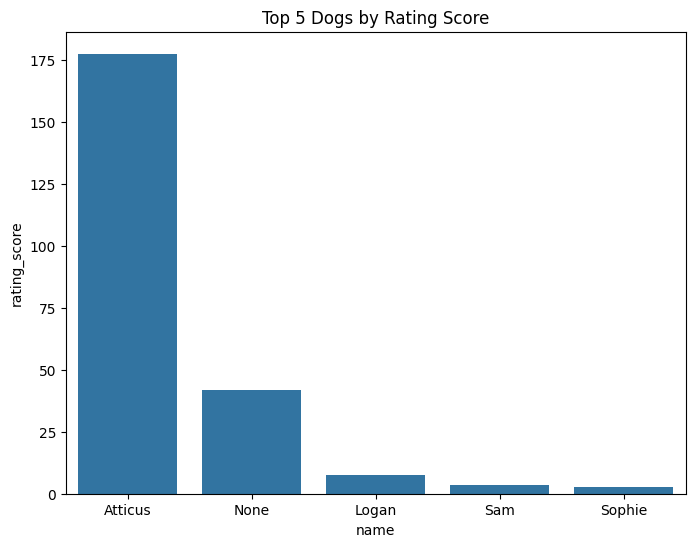

In [125]:
top_10 = twitter_master.sort_values('rating_score', ascending=False).fillna('None').head(5)
plt.figure(figsize=(8, 6))
base_color=sb.color_palette()[0]
plt.title("Top 5 Dogs by Rating Score")
sb.barplot(data=top_10, x='name', y='rating_score', color=base_color);

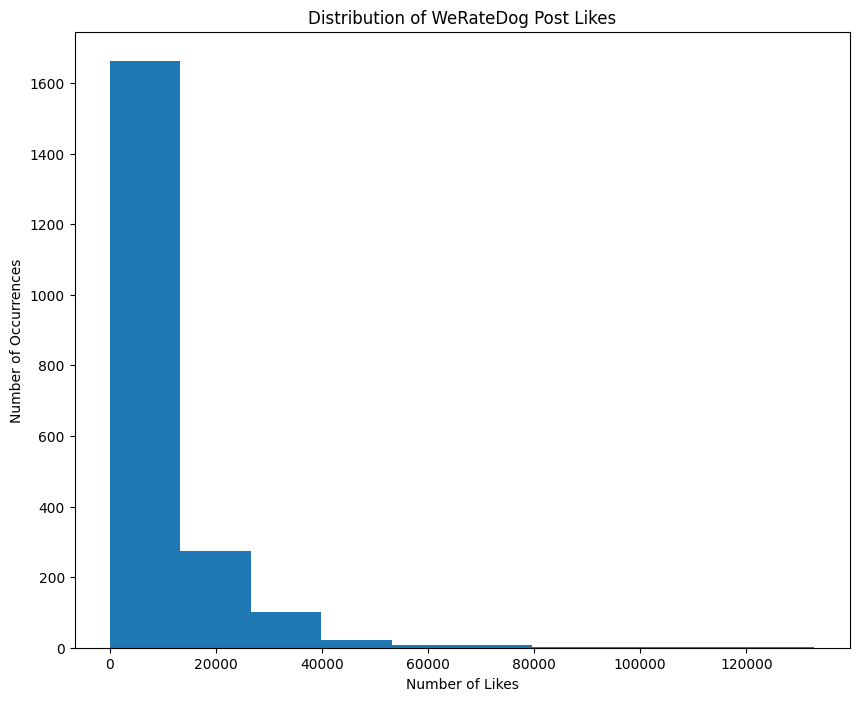

In [126]:
# histogram to visualise the distribution of post likes
plt.figure(figsize=(10, 8))
plt.title('Distribution of WeRateDog Post Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Number of Occurrences')
plt.hist(twitter_master['favourite_count'].dropna());

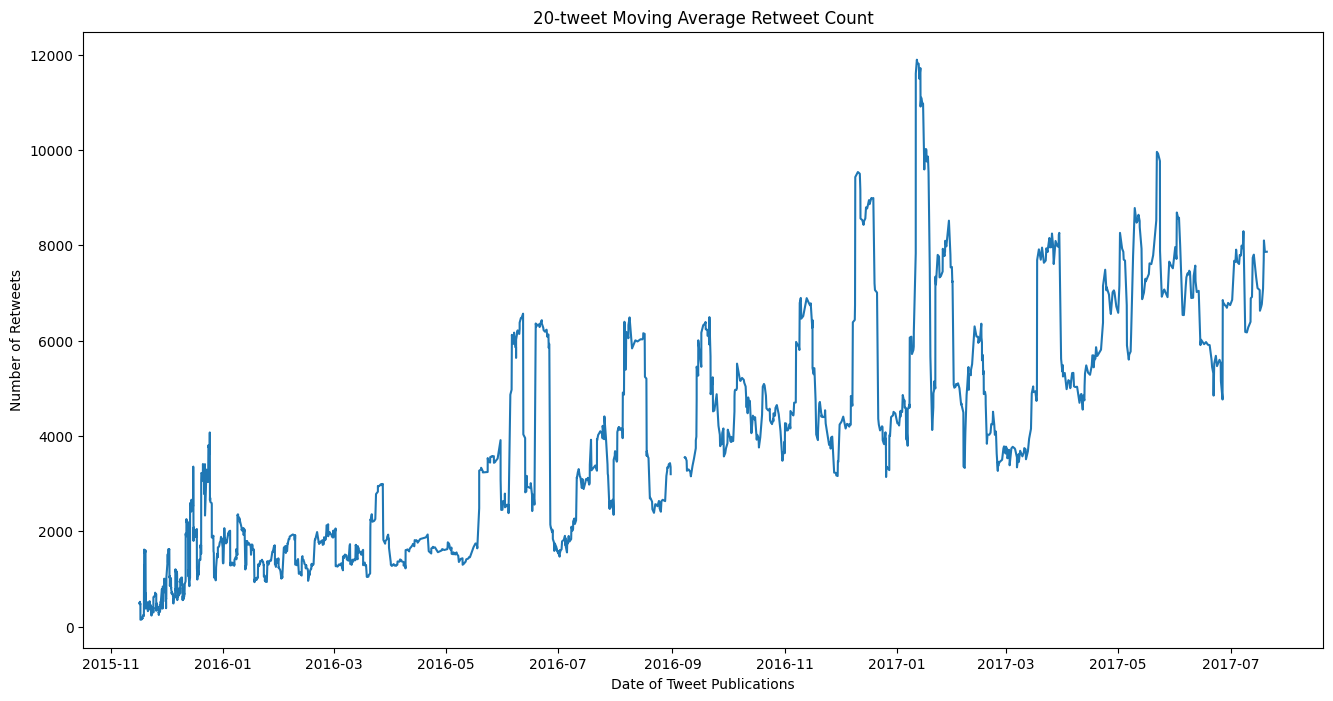

In [127]:
# line chart to visualise the moving average of the number of retweets
plt.figure(figsize=(16, 8))
y = twitter_master['retweet_count'].rolling(20).mean()
plt.title('20-tweet Moving Average Retweet Count')
plt.ylabel('Number of Retweets')
plt.xlabel("Date of Tweet Publications")
plt.plot(twitter_master['timestamp'], y);

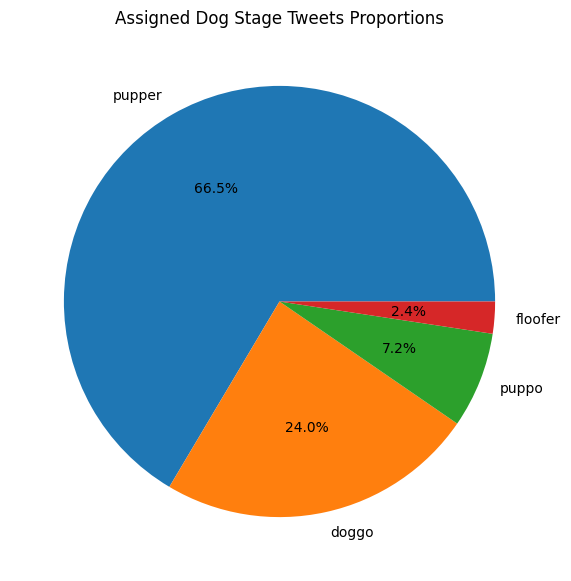

In [128]:
# Pie chart representing assigned dog stage proportions
stage_series = twitter_master['dog_stage'].value_counts()
plt.figure(figsize=(7, 7))

plt.title('Assigned Dog Stage Tweets Proportions')
plt.pie(stage_series,
        autopct='%1.1f%%',
       labels=stage_series.index);